<a href="https://colab.research.google.com/github/Anirban095/Kaggle-Projects/blob/main/5.%20New%20York%20City%20Taxi%20Trip%20Duration/NY_City_Taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_filePath = '/content/drive/MyDrive/Kaggle Projects/Data/train.csv'
test_filePath = '/content/drive/MyDrive/Kaggle Projects/Data/test.csv'
df_train = pd.read_csv(train_filePath)
df_test = pd.read_csv(test_filePath)

In [5]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [7]:
df_test.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000
mean,1.534884,1.661765,-73.973614,40.750927,-73.973458,40.751816
std,0.498782,1.311293,0.073389,0.029848,0.072565,0.035824
min,1.000000,0.000000,-121.933128,37.389587,-121.933327,36.601322
25%,1.000000,1.000000,-73.991852,40.737392,-73.991318,40.736000
50%,2.000000,1.000000,-73.981743,40.754093,-73.979774,40.754543
75%,2.000000,2.000000,-73.967400,40.768394,-73.963013,40.769852
max,2.000000,9.000000,-69.248917,42.814938,-67.496796,48.857597


In [22]:
df_test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [8]:
df_train['pickup_datetime'] = pd.to_datetime(df_train['pickup_datetime'])
df_train['dropoff_datetime'] = pd.to_datetime(df_train['dropoff_datetime'])

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


In [10]:
df_train['pickup_day'] = df_train['pickup_datetime'].dt.day_name()
df_train['pickup_day_no'] = df_train['pickup_datetime'].dt.weekday
df_train['pickup_day_hour'] = df_train['pickup_datetime'].dt.hour
df_train['pickup_day_month'] = df_train['pickup_datetime'].dt.month

In [11]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_day_no,pickup_day_hour,pickup_day_month
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,0,17,3
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,6,0,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,1,11,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,2,19,4
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,5,13,3


In [12]:
df_train['dropoff_day'] = df_train['dropoff_datetime'].dt.day_name()
df_train['dropoff_day_no'] = df_train['dropoff_datetime'].dt.weekday
df_train['dropoff_day_hour'] = df_train['dropoff_datetime'].dt.hour
df_train['dropoff_day_month'] = df_train['dropoff_datetime'].dt.month

In [13]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_day_no,pickup_day_hour,pickup_day_month,dropoff_day,dropoff_day_no,dropoff_day_hour,dropoff_day_month
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,0,17,3,Monday,0,17,3
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,6,0,6,Sunday,6,0,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,1,11,1,Tuesday,1,12,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,2,19,4,Wednesday,2,19,4
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,5,13,3,Saturday,5,13,3


This library is for calculating distance from longitude and latitude

In [14]:
!pip install haversine

In [15]:
from geopy.distance import great_circle, geodesic
import haversine as hs
from haversine import Unit

In [16]:
def calculate_distance(pickup_lat, pickup_long, drop_lat, drop_long):
  pickup_point = (pickup_lat, pickup_long)
  drop_point = (drop_lat, drop_long)

  return hs.haversine(pickup_point, drop_point, unit = Unit.KILOMETERS)

In [17]:
df_train['trip_distance'] = df_train.apply(lambda x: calculate_distance(x['pickup_latitude'], x['pickup_longitude'], x['dropoff_latitude'], x['dropoff_longitude']), axis =1)

In [18]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_day_no,pickup_day_hour,pickup_day_month,dropoff_day,dropoff_day_no,dropoff_day_hour,dropoff_day_month,trip_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,0,17,3,Monday,0,17,3,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,6,0,6,Sunday,6,0,6,1.805510
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,1,11,1,Tuesday,1,12,1,6.385107
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,2,19,4,Wednesday,2,19,4,1.485500
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,5,13,3,Saturday,5,13,3,1.188590


In [19]:
df_train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'pickup_day_no', 'pickup_day_hour',
       'pickup_day_month', 'dropoff_day', 'dropoff_day_no', 'dropoff_day_hour',
       'dropoff_day_month', 'trip_distance'],
      dtype='object')

In [20]:
train = df_train[['id', 'vendor_id', 'passenger_count', 'store_and_fwd_flag', 'trip_duration', 'pickup_day', 'pickup_day_no', 'pickup_day_hour', 
                  'pickup_day_month', 'dropoff_day', 'dropoff_day_no', 'dropoff_day_hour', 'dropoff_day_month', 'trip_distance']]

In [21]:
train.head()

,id,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,pickup_day,pickup_day_no,pickup_day_hour,pickup_day_month,dropoff_day,dropoff_day_no,dropoff_day_hour,dropoff_day_month,trip_distance
0,id2875421,2,1,N,455,Monday,0,17,3,Monday,0,17,3,1.498523
1,id2377394,1,1,N,663,Sunday,6,0,6,Sunday,6,0,6,1.805510
2,id3858529,2,1,N,2124,Tuesday,1,11,1,Tuesday,1,12,1,6.385107
3,id3504673,2,1,N,429,Wednesday,2,19,4,Wednesday,2,19,4,1.485500
4,id2181028,2,1,N,435,Saturday,5,13,3,Saturday,5,13,3,1.188590


**Visualisation and Feature Engineering**

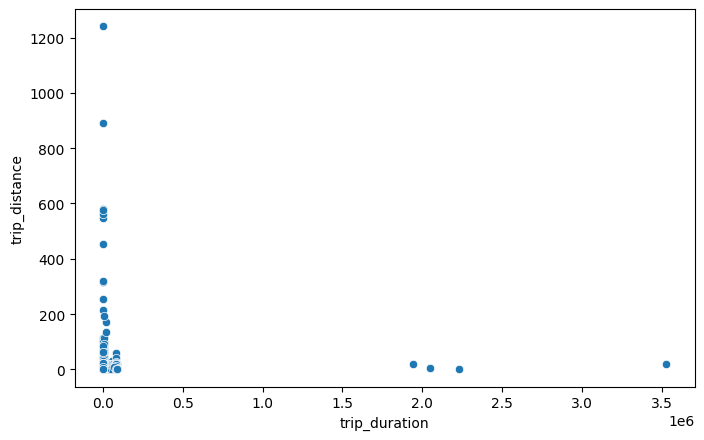

In [28]:
plt.figure(figsize=(8,5), dpi=100)
sns.scatterplot(data = train, y='trip_distance', x='trip_duration')

In [29]:
#removing data where distance equals zero and duration is high. These are outliers.

In [49]:
train[train['trip_distance'] == 0].sort_values(by = 'trip_duration')

,id,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,pickup_day,pickup_day_no,pickup_day_hour,pickup_day_month,dropoff_day,dropoff_day_no,dropoff_day_hour,dropoff_day_month,trip_distance
810851,id1250016,1,1,N,1,Thursday,3,17,3,Thursday,3,17,3,0.0
1165514,id2757288,1,1,N,1,Sunday,6,23,4,Sunday,6,23,4,0.0
285635,id0075470,1,1,N,1,Monday,0,16,3,Monday,0,16,3,0.0
346959,id1171557,1,1,N,1,Wednesday,2,16,2,Wednesday,2,16,2,0.0
451396,id2836747,1,1,N,1,Tuesday,1,10,1,Tuesday,1,10,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149352,id1340787,2,2,N,4683,Wednesday,2,17,5,Wednesday,2,18,5,0.0
607368,id2237791,2,1,N,5929,Wednesday,2,16,6,Wednesday,2,18,6,0.0
833356,id2761053,2,1,N,78288,Wednesday,2,13,5,Thursday,3,11,5,0.0
120183,id3070191,2,3,N,85333,Friday,4,15,1,Saturday,5,15,1,0.0


In [65]:
len(train[(train['trip_distance'] == 0)  & (train['trip_duration'] < 30)]) #.index)

1335

In [66]:
# Just assuming any trip duration less than 30 seconds with 0 distance is not a valid trip, hence deleting those.

In [68]:
train = train.drop(train[(train['trip_distance'] == 0)  & (train['trip_duration'] < 30)].index)

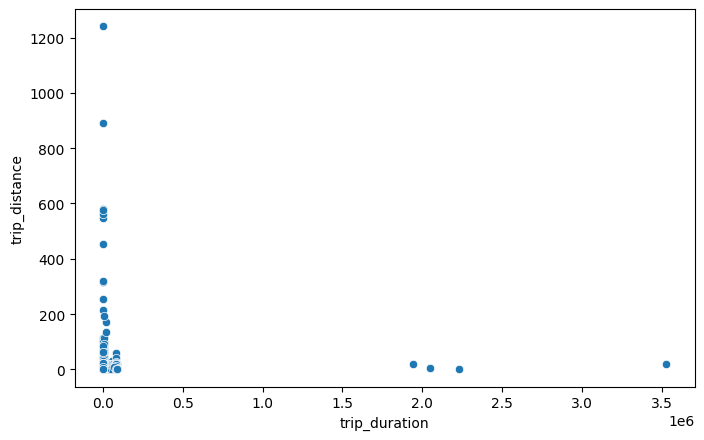

In [69]:
plt.figure(figsize=(8,5), dpi=100)
sns.scatterplot(data = train, y='trip_distance', x='trip_duration')

In [80]:
train = train.drop(train[train['trip_duration'] > 90000].index)

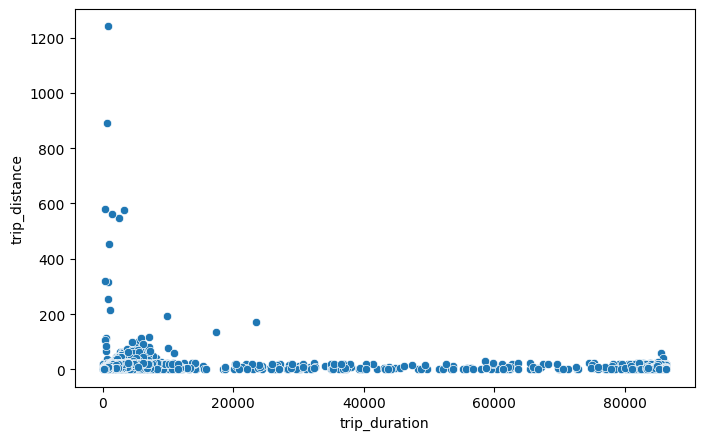

In [81]:
plt.figure(figsize=(8,5), dpi=100)
sns.scatterplot(data = train, y='trip_distance', x='trip_duration')

In [88]:
train['Speed(km/hr)'] = train['trip_distance'] / (train['trip_duration']/ 3600)

In [90]:
train['Speed(km/hr)'].sort_values(ascending = False)

1176337    9274.849542
910072     6877.349905
184925     5640.501776
974378     5251.023246
377068     4086.717665
              ...     
290802        0.000000
1215451       0.000000
347814        0.000000
856433        0.000000
759689        0.000000
Name: Speed(km/hr), Length: 1457305, dtype: float64

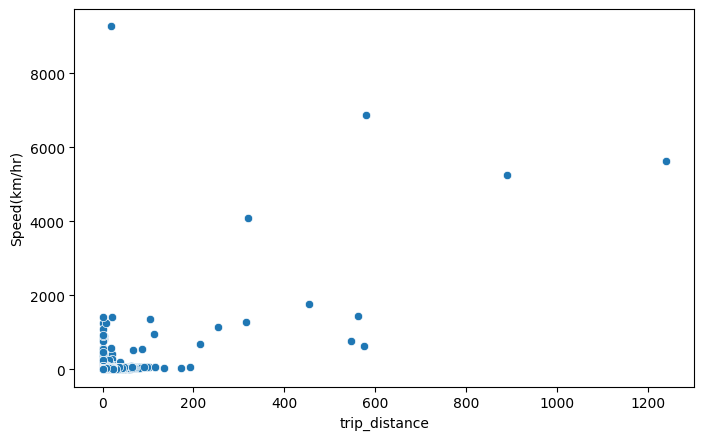

In [91]:
plt.figure(figsize=(8,5), dpi=100)
sns.scatterplot(data = train, y='Speed(km/hr)', x='trip_distance')

In [99]:
# For a taxi it is impossible that its speed in km/hr is more than 200 (still it is very high) 

In [100]:
len(train[train['Speed(km/hr)'] > 200])

68

In [101]:
train = train.drop(train[train['Speed(km/hr)'] > 200].index)

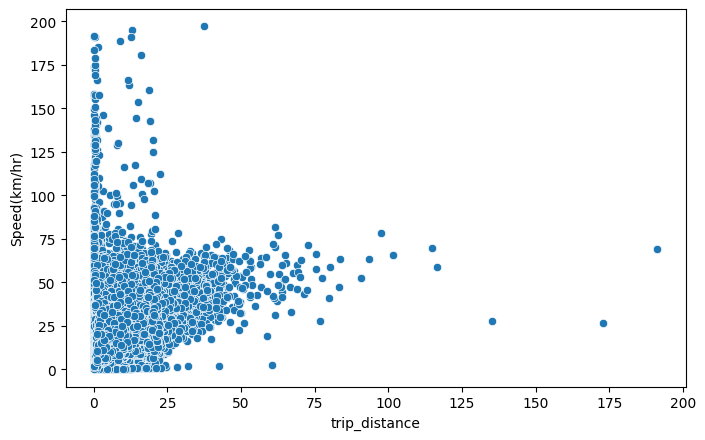

In [102]:
plt.figure(figsize=(8,5), dpi=100)
sns.scatterplot(data = train, y='Speed(km/hr)', x='trip_distance')

In [103]:
# Now this data looks clean, we can delete the speed column

In [107]:
train = train.drop(columns='Speed(km/hr)')

In [108]:
train.head()

,id,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,pickup_day,pickup_day_no,pickup_day_hour,pickup_day_month,dropoff_day,dropoff_day_no,dropoff_day_hour,dropoff_day_month,trip_distance
0,id2875421,2,1,N,455,Monday,0,17,3,Monday,0,17,3,1.498523
1,id2377394,1,1,N,663,Sunday,6,0,6,Sunday,6,0,6,1.805510
2,id3858529,2,1,N,2124,Tuesday,1,11,1,Tuesday,1,12,1,6.385107
3,id3504673,2,1,N,429,Wednesday,2,19,4,Wednesday,2,19,4,1.485500
4,id2181028,2,1,N,435,Saturday,5,13,3,Saturday,5,13,3,1.188590


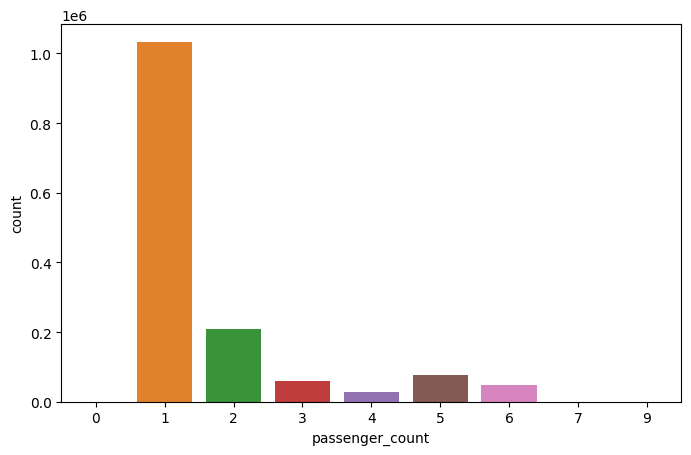

In [113]:
plt.figure(figsize=(8,5), dpi=100)
sns.countplot(x='passenger_count',data=train)

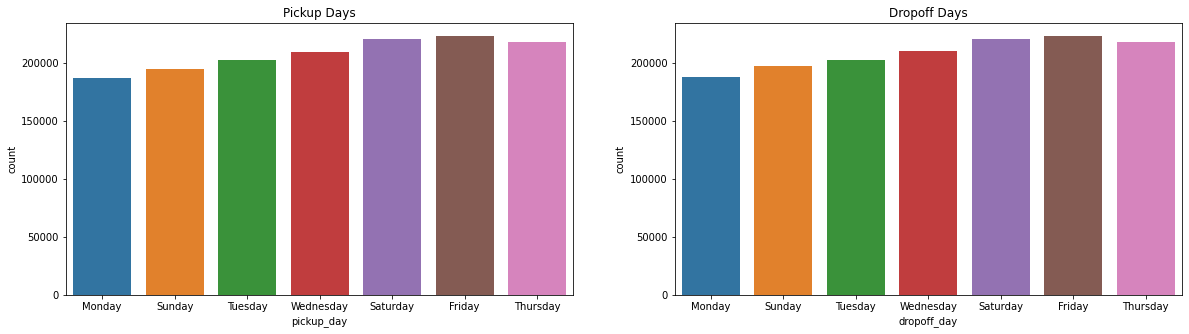

In [114]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=train,ax=ax1)
ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=train,ax=ax2)

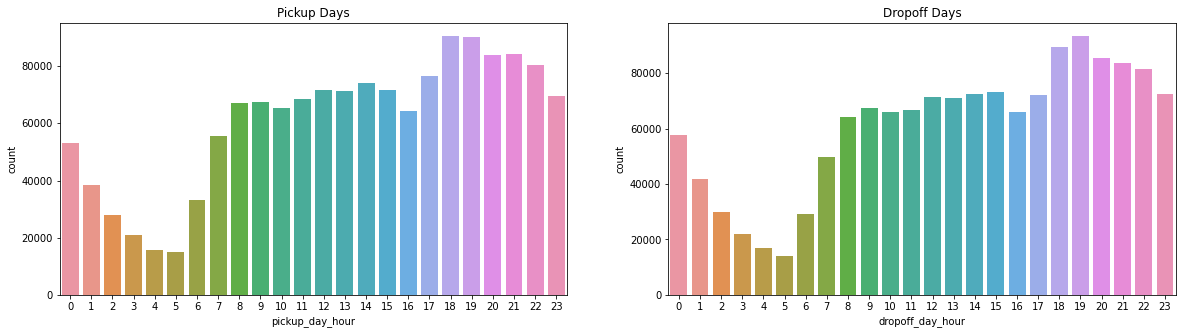

In [117]:
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))
ax3.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day_hour",data=train,ax=ax3)
ax4.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day_hour",data=train,ax=ax4)